<a href="https://colab.research.google.com/github/MichelleThuo/MLInternshipTasks/blob/main/Task4%3ALocationBasedAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preprocessing

In [2]:
# Load the dataset
file_path = 'Dataset .csv'
df = pd.read_csv(file_path)

# Display basic information and the first few rows
print(df.info())
print(df.head())

# Check for necessary columns and handle missing values if any
# Dropping rows with missing values in key columns to ensure our analysis is accurate.
# We focus on 'Latitude', 'Longitude', 'City', 'Locality', 'Aggregate rating', 'Cuisines', and 'Price range'
df = df.dropna(subset=['Latitude', 'Longitude', 'City', 'Locality', 'Aggregate rating', 'Cuisines', 'Price range'])

# Convert to GeoDataFrame for easier geographic plotting and analysis
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Data Cleaning Note:
# Here,I chose to drop rows with missing values in certain columns.
# However, in a real-world scenario, I could explore options like filling missing values with averages or modes.
# This decision was made to ensure that the visualizations and analysis remain reliable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Step 2: Visualize the Latitude and Longitude Distribution

<Figure size 1000x800 with 0 Axes>

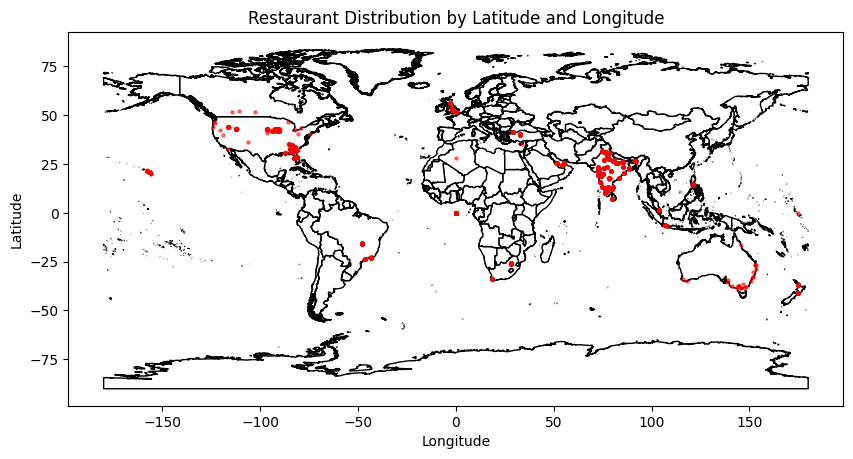

In [4]:
# Plots the distribution of restaurants based on latitude and longitude
plt.figure(figsize=(10, 8))
# Load a base world map
world = gpd.read_file('ne_10m_admin_0_countries.shp')
base = world.plot(color='white', edgecolor='black', figsize=(10, 8))
# Overlay the restaurant points
gdf.plot(ax=base, marker='o', color='red', markersize=5, alpha=0.5)
plt.title('Restaurant Distribution by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Step 3: Visualize the Latitude and Longitude Distribution

        city  restaurant_count
0  New Delhi              5473
1    Gurgaon              1118
2      Noida              1080
3  Faridabad               251
4  Ghaziabad                25


<ipython-input-5-50ed88877b56>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_counts.head(10), x='city', y='restaurant_count', palette='viridis')


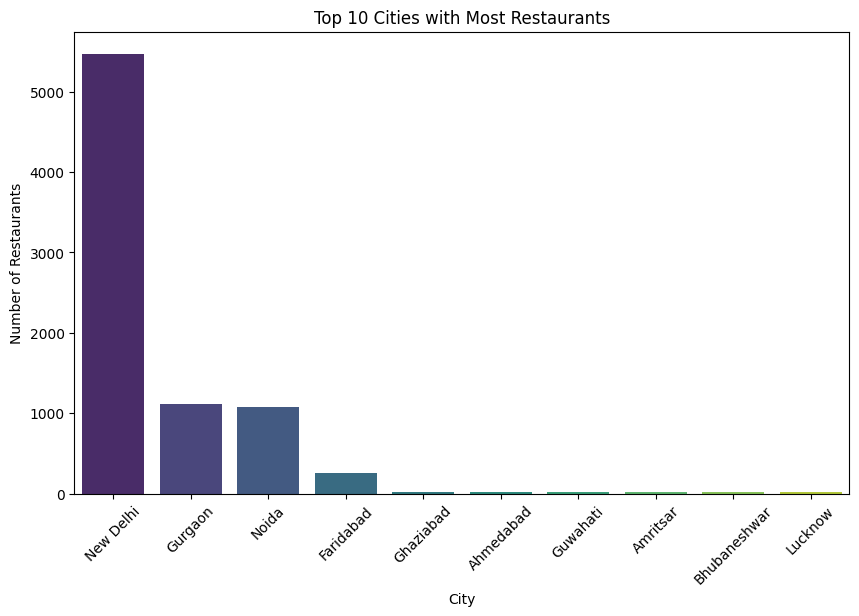

In [5]:
# Count number of restaurants by city
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['city', 'restaurant_count']
print(city_counts.head())

# Visualize the concentration of restaurants in top 10 cities
# Plots the top 10 cities for a given metric
plt.figure(figsize=(10, 6))
sns.barplot(data=city_counts.head(10), x='city', y='restaurant_count', palette='viridis')
plt.title('Top 10 Cities with Most Restaurants')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

# Step 4: Calculate statistics such as average rating, cuisine count, and price range by city/locality

        City  avg_rating  cuisine_count  avg_price_range
0  Abu Dhabi    4.300000             17         3.300000
1       Agra    3.965000             15         2.650000
2  Ahmedabad    4.161905             21         2.571429
3     Albany    3.552941             16         1.823529
4  Allahabad    3.395000             18         2.650000


<ipython-input-6-d3cc9005d511>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities_rating, x='City', y='avg_rating', palette='coolwarm')


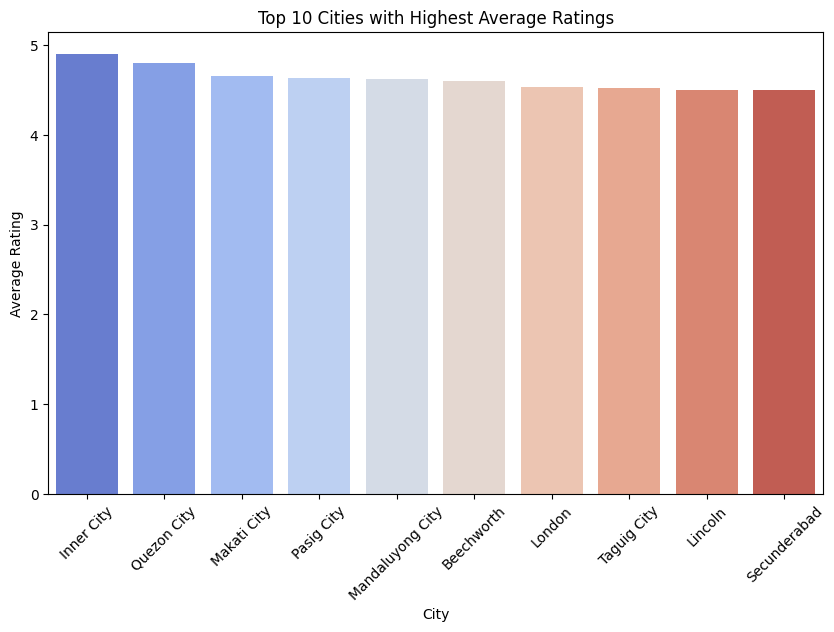

<ipython-input-6-d3cc9005d511>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities_price, x='City', y='avg_price_range', palette='magma')


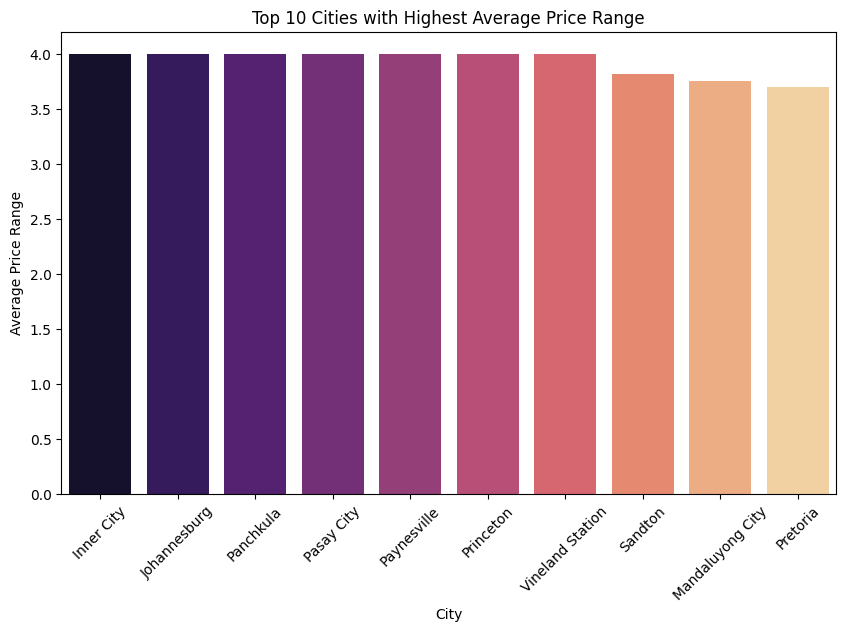

In [6]:
city_stats = df.groupby('City').agg(
    avg_rating=('Aggregate rating', 'mean'),
    cuisine_count=('Cuisines', 'nunique'),
    avg_price_range=('Price range', 'mean')
).reset_index()
print(city_stats.head())

# Visualize average rating by city (top 10)
top_cities_rating = city_stats.nlargest(10, 'avg_rating')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities_rating, x='City', y='avg_rating', palette='coolwarm')
plt.title('Top 10 Cities with Highest Average Ratings')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()

# Visualize average price range by city (top 10)
top_cities_price = city_stats.nlargest(10, 'avg_price_range')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities_price, x='City', y='avg_price_range', palette='magma')
plt.title('Top 10 Cities with Highest Average Price Range')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Average Price Range')
plt.show()

# Step 5: Identify interesting insights or patterns related to the locations

Top 10 cities with the most variety in cuisines:
          City  avg_rating  cuisine_count  avg_price_range
87   New Delhi    2.438845            892         1.621597
50     Gurgaon    2.651431            362         1.855993
88       Noida    2.036204            248         1.601852
43   Faridabad    1.866932             87         1.454183
2    Ahmedabad    4.161905             21         2.571429
22   Cape Town    4.110000             20         3.200000
29  Coimbatore    4.135000             20         2.400000
30     Colombo    3.870000             20         2.850000
36  Des Moines    4.235000             20         2.150000
58      Jaipur    4.130000             20         2.850000


<ipython-input-7-bcb618c04869>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities_cuisine_variety, x='City', y='cuisine_count', palette='plasma')


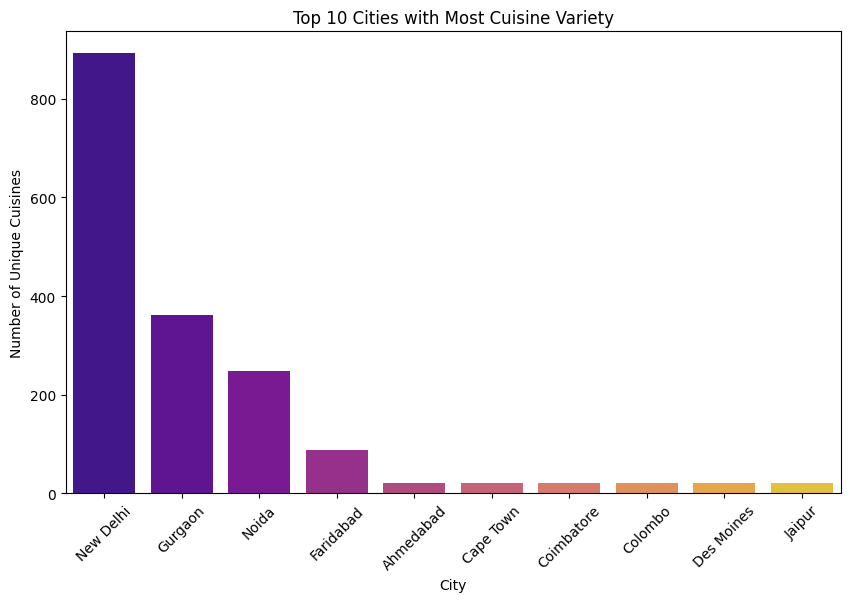

In [7]:
# Identify cities with highest variety in cuisines
top_cities_cuisine_variety = city_stats.nlargest(10, 'cuisine_count')
print("Top 10 cities with the most variety in cuisines:")
print(top_cities_cuisine_variety)

# Visualize cities with the most cuisine variety
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities_cuisine_variety, x='City', y='cuisine_count', palette='plasma')
plt.title('Top 10 Cities with Most Cuisine Variety')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Number of Unique Cuisines')
plt.show()

# Insights
- Cities with a higher variety of cuisines might indicate a more diverse food culture or a larger population.
- Cities with higher average ratings could have a focus on quality dining experiences or a more discerning customer base.
- The average price range could vary due to economic factors in different cities or a higher concentration of luxury dining spots.

# Limitations
- I dropped rows with missing values instead of imputing them, which could potentially reduce our dataset size.

#   Future Improvements
Could involve:
- Using techniques like filling missing ratings with the city average.
- The analysis focuses primarily on city-level statistics. To gain deeper insights, we could analyze at the neighborhood/locality level.
- Including more features like customer reviews or time-series trends in ratings could further enhance the model's predictive power.